In [2]:
! pip install captcha

     |████████████████████████████████| 102kB 5.1MB/s 


In [3]:
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random
%config InlineBackend.figure_format='retina'

import string
characters = string.digits+string.ascii_uppercase
print(characters)

0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ


Text(0.5, 1.0, 'GGL0')

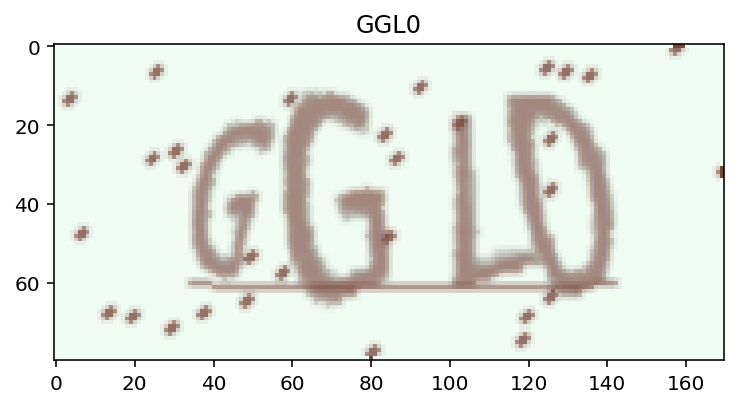

In [4]:
width,height,n_len,n_class = 170,80,4,len(characters)+1

#產生驗證碼
generator = ImageCaptcha(width=width,height=height)
#各定長度的驗證碼
random_str = ''.join([random.choice(characters) for j in range(4)])
img = generator.generate_image(random_str)

plt.imshow(img)
plt.title(random_str)

In [5]:
from keras import *
from keras.layers import *

Using TensorFlow backend.


In [0]:
'''
  建構cnn模型
'''
input_tensor = Input((height,width,3))
x = input_tensor
x = Conv2D(64,(3,3),name="a")(input_tensor)
x = Activation("relu")(x)


In [11]:
conv_shape = x.get_shape()
conv_shape

TensorShape([Dimension(None), Dimension(71), Dimension(161), Dimension(64)])

In [14]:


x = Reshape(target_shape=(int(conv_shape[2]),int(conv_shape[1]*conv_shape[3])))(x)
x = Dense(64,activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(n_class,activation="softmax")(x)

base_model = Model(input=input_tensor,output=x)
##設定要給CTC Loss的資訊
labels = Input(name='the_labels', shape=[n_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), 
                  name='ctc')([x, labels, input_length, label_length])

##這裡的model是用來計算loss
model = Model(input=[input_tensor, labels, input_length, label_length], output=[loss_out])

##之所以要lambda y_true, y_pred: y_pred是因為我們的loss已經包在網路裡，會output:y_true, y_pred，而我們只需要y_pred
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer='SGD')

IndexError: ignored